# 2022 NZMSA Data Science Submission

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis

The dataset weather-data.csv is obtained from [IOWA Environmental Mesonet - Iowa State University](https://mesonet.agron.iastate.edu/).

Columns for this dataset:

- **station**: Acronym for the place of data capture.
- **valid**: Date and time of capture.
- **tmpc**: Temperature of the environment in celsius.
- **dwpc**: Temperature of the dew point in the environment in celsius.
- **relh**: Relative humidity of the environment in percentage.
- **sknt**: Wind Speed in knots.
- **gust**: Wind Gust in knots.
- **peak_wind_drct**: Peak Wind Gust Direction (from PK WND METAR remark). (deg).

In [54]:
dataset = pd.read_csv("weather-data.csv")

# Show the first five results
dataset.head() 

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [55]:
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


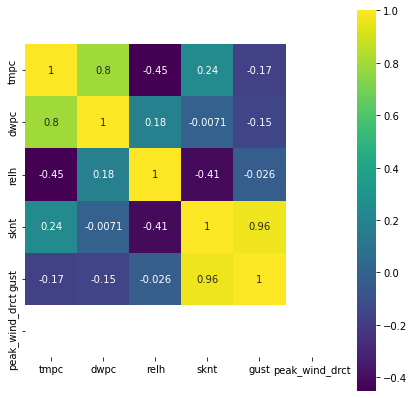

In [57]:
plt.figure(figsize=(7,7))
sns.heatmap(data=dataset.corr(), square=True, annot=True, cmap='viridis')
plt.show()

It appears that peak_wind_drct is an empty feature.

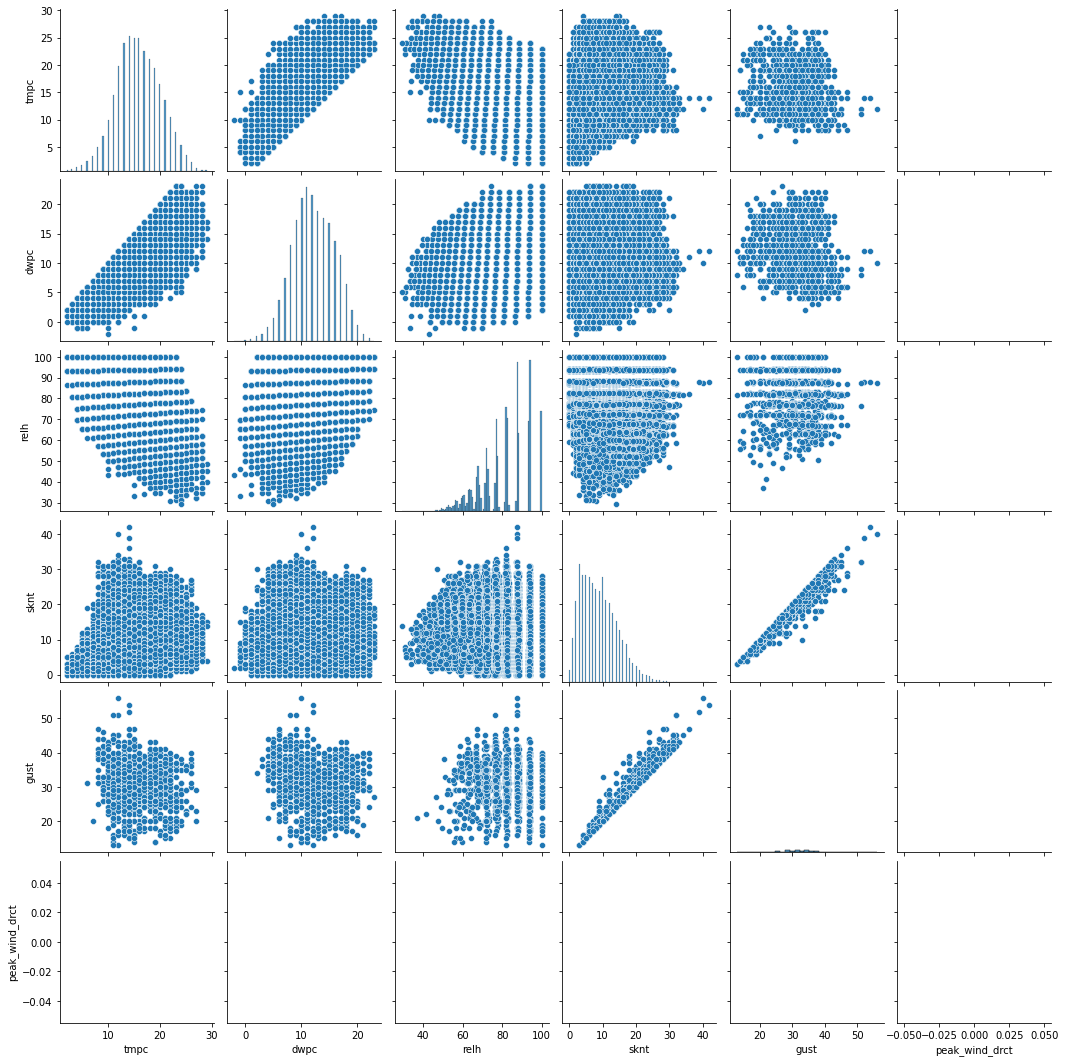

In [58]:
sns.pairplot(data=dataset)

There appears to be a strong correlation between **gust** and **sknt**.

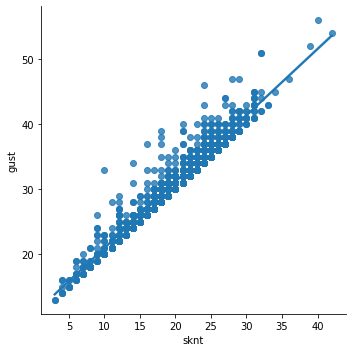

In [59]:
sns.lmplot(y='gust', x='sknt', data=dataset)

# Data Processing

<AxesSubplot:>

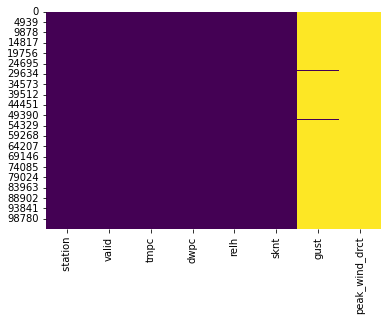

In [60]:
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')

There is a lot of missing values for gust and peak_wind_drct. Luckily, since there is a strong correlation between gust and sknt, we can use sknt to fill in the missing values for gust if needed. On the other hand, if peak_wind_drct is indeed an empty column, we can drop it.

In [61]:
dataset['peak_wind_drct'].value_counts()

Series([], Name: peak_wind_drct, dtype: int64)

It looks like **peak_wind_drct** doesn't have any values in it. We can safely drop this column.

In [62]:
dataset.drop(columns = 'peak_wind_drct', inplace=True)

In [63]:
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt,gust
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN


<AxesSubplot:>

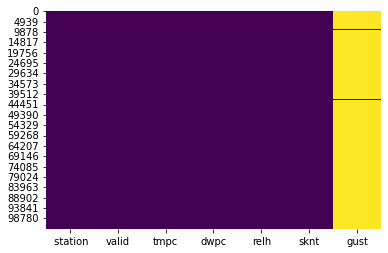

In [64]:
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')

Now, before we try to impute missing gust values, we should check if it is worth doing so. If the number of missing data is much more than the amount available, it would be wise to just drop the feature altogether.

<AxesSubplot:xlabel='gust_missing', ylabel='count'>

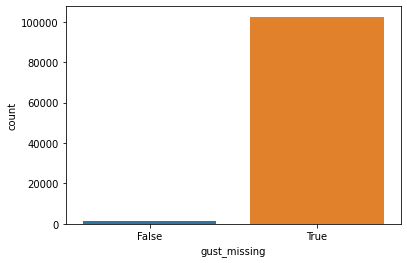

In [65]:
df = pd.DataFrame(dataset['gust'].isna())
df.rename(columns={'gust': 'gust_missing'}, inplace=True)
sns.countplot(data=df, x='gust_missing')

In [66]:
# Find percentage of missing data
percentage = df[df['gust_missing']==False].count()/df.count()*100
print(f'Percentage of missing gust data = {100-float(percentage)}')

Percentage of missing gust data = 98.84006826530907


Since about 99% of the rows are missing gust data, instead of interpolating, it would be best if we dropped this column.

In [67]:
dataset.drop(columns = 'gust', inplace=True)

<AxesSubplot:>

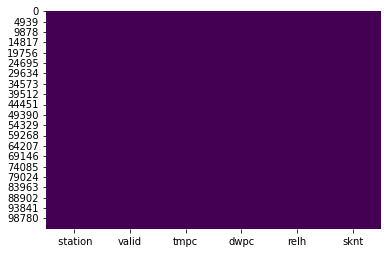

In [68]:
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')

Now, let's check for any other missing values.

In [69]:
dataset.isnull().sum()

 station      0
valid         0
tmpc         35
dwpc         35
relh        120
sknt          9
dtype: int64

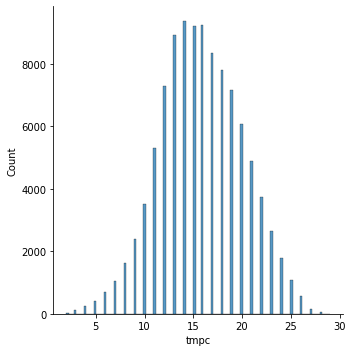

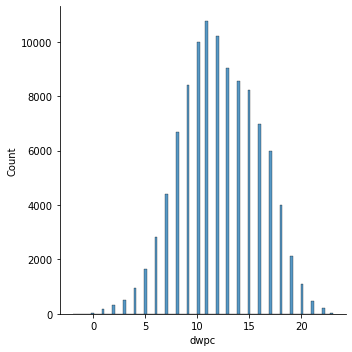

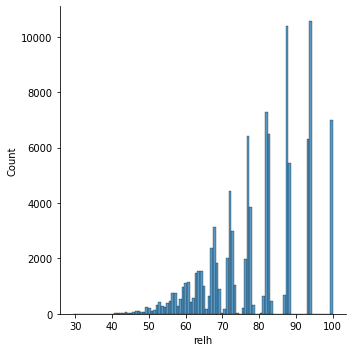

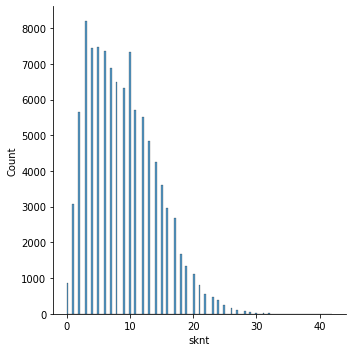

In [70]:
sns.displot(dataset['tmpc'])
sns.displot(dataset['dwpc'])
sns.displot(dataset['relh'])
sns.displot(dataset['sknt'])

Since, tmpc and dwpc are normally distributed, we can use the mean value to fill in the missing rows for these features. As sknt and relh are skewed, we will use the median value for replacement of empty cells.

In [71]:
dataset['tmpc'].fillna(dataset['tmpc'].mean(), inplace=True)
dataset['dwpc'].fillna(dataset['dwpc'].mean(), inplace=True)
dataset['sknt'].fillna(dataset['tmpc'].median(), inplace=True)
dataset['relh'].fillna(dataset['relh'].median(), inplace=True)
dataset.isnull().sum()

 station    0
valid       0
tmpc        0
dwpc        0
relh        0
sknt        0
dtype: int64

### Extracting time from the valid variable

In [72]:
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [73]:
dataset['valid'] = pd.to_datetime(dataset['valid'], format = '%Y-%m-%d %H:%M',  errors = 'coerce')
dataset['year'] = dataset['valid'].dt.year
dataset['month'] = dataset['valid'].dt.month
dataset['day'] = dataset['valid'].dt.day
dataset['hour'] = dataset['valid'].dt.hour
dataset['minute'] = dataset['valid'].dt.minute
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt,year,month,day,hour,minute
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,2015,1,1,0,0
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,2015,1,1,0,30
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,2015,1,1,1,0
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,2015,1,1,1,30
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,2015,1,1,2,0


### How many stations do we have?

In [74]:
dataset[' station'].value_counts()

NZAA    103713
Name:  station, dtype: int64

Since there is only station which is NZAA, we can drop this column.

In [75]:
# Drop station, valid and time columns
dataset.drop([' station', 'valid'], axis=1, inplace=True)

In [76]:
dataset.head()

,tmpc,dwpc,relh,sknt,year,month,day,hour,minute
0,21.0,11.0,52.77,15.0,2015,1,1,0,0
1,21.0,10.0,49.37,16.0,2015,1,1,0,30
2,21.0,12.0,56.38,16.0,2015,1,1,1,0
3,21.0,13.0,60.21,16.0,2015,1,1,1,30
4,21.0,12.0,56.38,16.0,2015,1,1,2,0


### Latest Month

In [77]:
dataset['year'].value_counts()

2019    17504
2020    17497
2018    17457
2017    17234
2016    17051
2015    16970
Name: year, dtype: int64

In [78]:
# Extract the latest month for prediction later
latest_month = dataset[(dataset['year'] == 2020) & (dataset['month']==12)]

# Drop the latest month for training and testing
dataset.drop(dataset[(dataset['year'] == 2020) & (dataset['month']==12)].index, inplace=True)

In [79]:
dataset[dataset['year'] == 2020]

,tmpc,dwpc,relh,sknt,year,month,day,hour,minute
86216,21.0,16.0,73.09,13.0,2020,1,1,0,0
86217,21.0,16.0,73.09,12.0,2020,1,1,0,30
86218,20.0,15.0,72.92,13.0,2020,1,1,1,0
86219,20.0,15.0,72.92,10.0,2020,1,1,1,30
86220,20.0,15.0,72.92,12.0,2020,1,1,2,0
...,...,...,...,...,...,...,...,...,...
102268,18.0,13.0,72.56,17.0,2020,11,30,21,30
102269,19.0,13.0,68.15,16.0,2020,11,30,22,0
102270,18.0,14.0,77.45,18.0,2020,11,30,22,30
102271,18.0,14.0,77.45,20.0,2020,11,30,23,0


In [80]:
# Splitting the data
from sklearn.model_selection import train_test_split

X = dataset.drop('tmpc', axis=1)
y = dataset['tmpc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Data Modelling

### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [82]:
predictions = lm.predict(X_test)

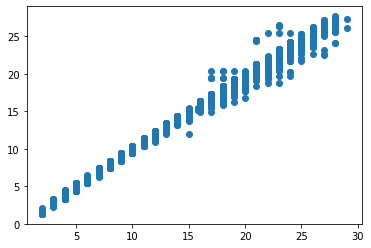

In [83]:
plt.scatter(y_test,predictions)

In [84]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.20536963530031346
MSE: 0.08743011002895573
RMSE: 0.29568582994278864


In [85]:
lm.score(X_test, y_test)

0.9951571207796126

### Latest Month Prediction

In [90]:
latest_month

,tmpc,dwpc,relh,sknt,year,month,day,hour,minute
102273,19.0,14.0,72.74,21.0,2020,12,1,0,0
102274,19.0,14.0,72.74,20.0,2020,12,1,0,30
102275,19.0,14.0,72.74,19.0,2020,12,1,1,0
102276,20.0,15.0,72.92,19.0,2020,12,1,1,30
102277,20.0,14.0,68.35,21.0,2020,12,1,2,0
...,...,...,...,...,...,...,...,...,...
103708,19.0,14.0,72.74,5.0,2020,12,30,21,30
103709,19.0,14.0,72.74,6.0,2020,12,30,22,0
103710,20.0,14.0,68.35,6.0,2020,12,30,22,30
103711,20.0,14.0,68.35,7.0,2020,12,30,23,0


In [91]:
predictions = lm.predict(latest_month.drop('tmpc', axis=1))

### Model Evaluation

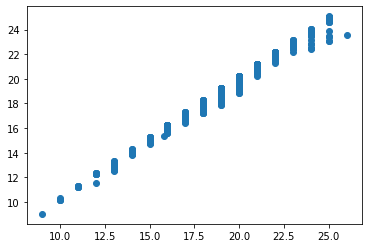

In [92]:
plt.scatter(latest_month['tmpc'],predictions)

In [93]:
lm.score(latest_month.drop('tmpc', axis=1), latest_month['tmpc'])

0.9888851967057881

In [95]:
print('MAE:', metrics.mean_absolute_error(latest_month['tmpc'], predictions))
print('MSE:', metrics.mean_squared_error(latest_month['tmpc'], predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(latest_month['tmpc'], predictions)))

MAE: 0.19799500250968063
MSE: 0.08367034739664372
RMSE: 0.28925827109461144


This was meant to be a simple model to begin our modelling but it looks like this simple model is accurate enough as is. Its temperature predictions are on average off by only 0.29 degrees Celsius and explains 99% of the variation in the temperature of the environment in Iowa.

In [108]:
# Check the coefficients of the model
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
dwpc,1.023680
relh,-0.207659
sknt,-0.011167
year,0.002100
month,-0.004964
day,-0.000232
hour,-0.002169
minute,0.000019


It appears that the dew point temperature is highly correlated to the temperature of the environment. It is possible that there is a formula containing both dew point temperature and the observed temperature.

After searching online, it indeed appears to be [true]((https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html). For simple approximations where the relative humidity, $R_H$ is more than 50%, the following holds true:

$$ T_d \approx {T - {{100 - R_H} \over 5}} $$ 

where $ T_d $ is the dew temperature, $ T $ is the observed temperature and $ R_H $ is the relative humidity in percentage.


Aside from $ T $ being directly correlated to $ T_d $, it is interesting to note that the absolute value of the coefficient of $ R_H $ is $ {1\over5} $ which is the same for our model, despite being negative. This could be due to some of the $R_H$ values not being more than 50%.

# Conclusion


We are interested in determining a relationship between the temperature of Iowa with various environmental variables that were  monitored by the Iowa Environmental Mesonet (IEM) from 2015 to 2020.

We found a strong increasing correlation between the observed temperature and the dew point temperature of the environment.

On average, a one degree Celsius increase in the temperature of the dew point in the environment is associated with an increase of 1.02 degrees Celsius in the observed temperature. We also observe that a one percent increase in the relative humidity of the environment decreases the mean temperature of the environment by 0.21 degrees Celsius.

Our model explains 99% of the variation in temperature in Iowa.